In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [47]:
#import BRCA dataset from Kaggle
dataset = pd.read_csv('/Users/chloeyachanin/Desktop/brca_data_w_subtypes.csv')

#clean up dataset for PCA
#identifying where string values present in dataset
string_columns = dataset.select_dtypes(include=['object']).columns.tolist()
print(string_columns)
#print(dataset[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']])

dataset = dataset.fillna(0)
#changing values in string dataset to numeric values
value_map = {'Positive': 1, 'Negative': 2, 'infiltrating ductal carcinoma': 3, 'infiltrating lobular carcinoma': 4, 'Performed but Not Available':0, 'Not Performed':0, 'Equivocal': 5, 'Indeterminate':6, 'Not Available':0, None: 0}

check_columns = ['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']  # list of string column names

string_value = 'Negative'

for index, row in dataset.iterrows():
    for string_column in check_columns:
        if row[string_column] in value_map:
            dataset.at[index, string_column] = value_map[row[string_column]]
       
print(dataset[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']]) 

#save new dataset
dataset.to_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv', index=False)



['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']
    PR.Status ER.Status HER2.Final.Status histological.type
0           1         1                 2                 3
1           1         2                 2                 3
2           1         1                 2                 3
3           1         1                 2                 3
4           1         1                 2                 3
..        ...       ...               ...               ...
700         0         0                 0                 4
701         0         0                 0                 4
702         0         0                 0                 4
703         0         0                 0                 4
704         0         0                 0                 4

[705 rows x 4 columns]


In [58]:
#importg new dataset
modified_dataset = pd.read_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv')

string_columns = modified_dataset.select_dtypes(include=['object']).columns.tolist()
#print(string_columns)
#print(modified_dataset['PR.Status'][700])
print(modified_dataset.iloc[:, -1])

#distribute data into two components X and Y
X = modified_dataset.iloc[:, 0:1940].values
y = modified_dataset.iloc[:, 1940].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_




0      3
1      3
2      3
3      3
4      3
      ..
700    4
701    4
702    4
703    4
704    4
Name: histological.type, Length: 705, dtype: int64


In [51]:
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test)

# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)



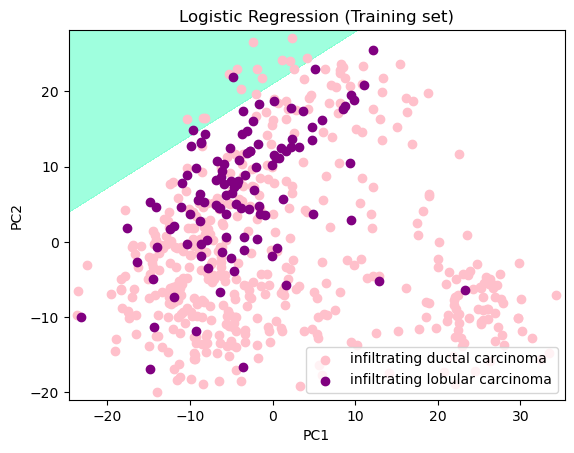

In [62]:
# Predicting the training set result through scatter plot 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

# Create a ListedColormap for the scatter plot
cmap_scatter = ListedColormap(('pink', 'purple', 'turquoise'))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

# Plot the training set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = cmap_scatter(i), label = ['infiltrating ductal carcinoma', 'infiltrating lobular carcinoma'][i])

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

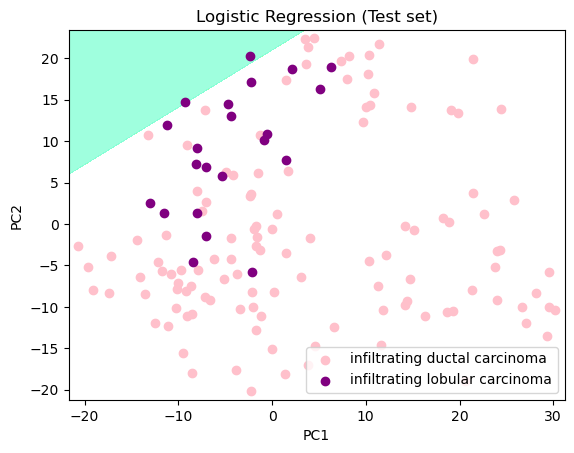

In [63]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = X_test, y_test
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = cmap_scatter(i), label = ['infiltrating ductal carcinoma', 'infiltrating lobular carcinoma'][i])
  
# title for scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
  
# show scatter plot
plt.show()